In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data sets
demographics_df = pd.read_csv("demographics.csv")
referral_df = pd.read_csv("referral.csv")
transactions_df = pd.read_csv("transactions.csv")
subscription_prices = pd.read_json("subscription_prices.json", orient='index')

### Exploring demographics_df's Properties

In [3]:
demographics_df.head(10)

,cust_id,customer_gender,age_group,customer_country
0,1_cust,Male,35-44,Denmark
1,2_cust,Other,18-24,Denmark
2,3_cust,Other,25-34,Norway
3,4,Male,18-24,Sweden
4,5_cust,Other,35-44,Sweden
5,6_cust,Other,55-65,Sweden
6,7,Other,25-34,Sweden
7,8_cust,Other,45-54,Sweden
8,9_cust,Female,25-34,Sweden
9,10,Other,25-34,Finland


In [4]:
demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10366 entries, 0 to 10365
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cust_id           10366 non-null  object
 1   customer_gender   10366 non-null  object
 2   age_group         10366 non-null  object
 3   customer_country  10366 non-null  object
dtypes: object(4)
memory usage: 324.1+ KB


In [5]:
# Checking if any columns in the dataset contain null values
cols = demographics_df.columns
flag = 0
for col in cols:
    if demographics_df[col].isnull().sum() > 0:
        print(f"Number of null values in {col} field is {demographics_df[col].isnull().sum()}")
        flag = 1
if flag == 0:
    print("There are no null value in any of the columns")

There are no null value in any of the columns


In [6]:
#Checking the unique values in the "customer_gender" column
demographics_df.customer_gender.unique()

array(['Male', 'Other', 'Female', 'f', 'm'], dtype=object)

In [7]:
# Replacing all the "f" and "m" in the column "customer_gender" with "Female" and "Male" respectively
demographics_df.customer_gender.replace("f","Female",inplace=True)
demographics_df.customer_gender.replace("m","Male",inplace=True)
demographics_df.customer_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

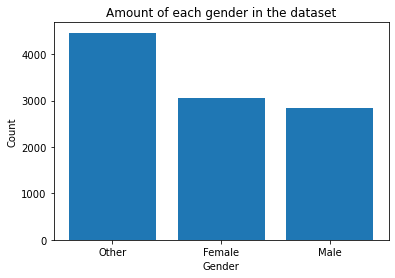

In [8]:
#Creating a bar plot for the number of occurrences of each unique value in the 'customer_gender' column
counts = demographics_df.customer_gender.value_counts()
plt.bar(counts.index, counts.values)
plt.title("Amount of each gender in the dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

This graph shows that the dataset seems to have a higher proportion of customers who identify as 'Other' compared to Males and Females. And the number of male and female customers is almost equal.

In [9]:
#Checking the unique values in the "age_group" column
demographics_df.age_group.unique()

array(['35-44', '18-24', '25-34', '55-65', '45-54'], dtype=object)

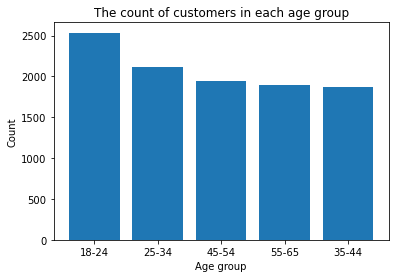

In [10]:
#Creating a bar plot for the number of occurrences of each unique value in the 'age_group' column
age_group_counts = demographics_df.age_group.value_counts()
plt.bar(age_group_counts.index, age_group_counts.values)
plt.title("The count of customers in each age group")
plt.xlabel("Age group")
plt.ylabel("Count")
plt.show()

This graph shows the count of customers in different age groups, with the highest count in the 18-24 age group, followed by the 25-34 age group.The 35-44 age group has the lowest count.

In [11]:
#Checking the unique values in the "customer_country" column
demographics_df.customer_country.unique()

array(['Denmark', 'Norway', 'Sweden', 'Finland', 'Norge', 'Sverige'],
      dtype=object)

In [12]:
# Replacing all the "Norge" and "Sverige" in the column "customer_country" with "Norway" and "Sweden" respectively
demographics_df.customer_country.replace("Norge","Norway",inplace=True)
demographics_df.customer_country.replace("Sverige","Sweden",inplace=True)
demographics_df.customer_country.unique()

array(['Denmark', 'Norway', 'Sweden', 'Finland'], dtype=object)

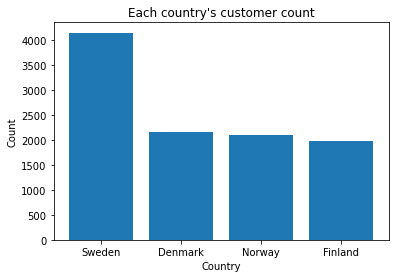

In [13]:
#Creating a bar plot for the number of occurrences of each unique value in the 'customer_country' column
country_counts = demographics_df.customer_country.value_counts()
plt.bar(country_counts.index, country_counts.values)
plt.title("Each country's customer count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

The data shows that Sweden has the highest customer count, followed by Denmark. Norway and Finland have relatively lower customer counts.

### Exploring referral_df's Properties

In [14]:
referral_df.head(10)

,id,referral_type
0,1,NaN
1,2,NaN
2,3,facebook
3,4,Display
4,5,NaN
5,6,facebook
6,7,facebook
7,8,facebook
8,9,facebook
9,10,NaN


In [15]:
referral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19141 entries, 0 to 19140
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             19141 non-null  object
 1   referral_type  10996 non-null  object
dtypes: object(2)
memory usage: 299.2+ KB


In [16]:
# Checking whether there are any null values in any columns in the dataset
cols = referral_df.columns
flag = 0
for col in cols:
    null_values_count = referral_df[col].isnull().sum()
    if  null_values_count > 0:
        print(f"There are null values {null_values_count} in {col}")
        flag = 1
if flag == 0:
    print("There are no null value in any of the columns")

There are null values 8145 in referral_type


This dataset contains 19,141 entries with 2 columns - id and referral_type. The id column has non-null values in all 19,141 entries, whereas referral_type column has only 10,996 non-null values. There are 8145 entries that have nan value this data set.By considering  that they didn't participated in any referral program. These nan values in the DataFrame are replaced with the value “direct subscription”.

In [17]:
#Checking uniques values for referral_type
referral_df.referral_type.unique()

array([nan, 'facebook', 'Display', 'Organic Search', 'Bing', 'Google Ads',
       'Paid Search', 'TV'], dtype=object)

In [18]:
#replacing nan with "Direct Subscription"
referral_df.referral_type.replace(np.NaN,"Direct Subscription",inplace=True)

In [19]:
referral_df.referral_type.unique()

array(['Direct Subscription', 'facebook', 'Display', 'Organic Search',
       'Bing', 'Google Ads', 'Paid Search', 'TV'], dtype=object)

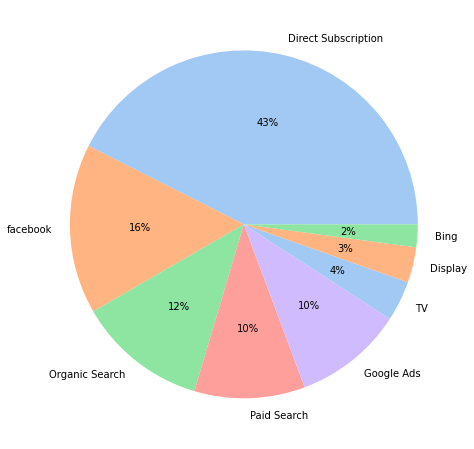

In [20]:
#creating a  pie chart to reprasent the participation of customers in different referral program
referral_data_counts = referral_df.referral_type.value_counts()
colors = sns.color_palette('pastel')[0:5]
fig = plt.figure(figsize=(8, 8))
plt.pie(referral_data_counts.values, labels = referral_data_counts.index, colors = colors, autopct='%.0f%%')
plt.show()

The above chart shows that the majority of customers (43%) subscribed directly without any refferal channel, while Facebook was the second most popular referral channel with 16% subscriptions. Organic search and paid search were the third and fourth most popular channels with 12% and 10% subscriptions respectively. Google Ads also received 10% subscriptions. The least popular channels were TV, display, and Bing with 4%, 3%, and 2% subscriptions respectively.

### Exploring transactions_df's Properties

In [21]:
transactions_df.head(10)

,cust_id,transaction_type,transaction_date,subscription_type
0,1,initial,2020-09-01,BASIC
1,2,initial,2022-03-01,BASIC
2,3,initial,2020-10-01,MAX
3,4,initial,2022-05-01,PRO
4,5,initial,2022-08-01,BASIC
5,6,initial,2022-06-01,MAX
6,7,initial,2022-02-01,MAX
7,8,initial,2021-01-01,BASIC
8,9,initial,2020-08-01,BASIC
9,10,initial,2022-09-01,MAX


In [22]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19141 entries, 0 to 19140
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cust_id            19141 non-null  int64 
 1   transaction_type   19141 non-null  object
 2   transaction_date   19141 non-null  object
 3   subscription_type  19141 non-null  object
dtypes: int64(1), object(3)
memory usage: 598.3+ KB


In [23]:
#Checking the number of null values in each column
cols = transactions_df.columns
flag = 0
for col in cols:
    null_values_count = transactions_df[col].isnull().sum()
    if  null_values_count > 0:
        print(f"There are {null_values_count} in {col}")
        flag = 1
if flag == 0:
    print("There are no null value in any of the columns")

There are no null value in any of the columns


In [24]:
#Checking the unique values of the "transaction_type" column
transactions_df.transaction_type.unique()

array(['initial', 'UPGRADE', ' ', 'REDUCTION', 'CHURN'], dtype=object)

Even though in the previous it was showing like there were no null values in the dataset there are some entries in the "transaction_type" column which has the value " ".

In [25]:
# Checking the number of entries with value " "
count = (transactions_df["transaction_type"] == ' ').sum()
print(count)

47


In [26]:
# Removing the entries with " " as the value for "transaction_type".
transactions_df.drop(transactions_df[transactions_df["transaction_type"]==" "].index, inplace=True)

In [27]:
# Making sure that rows with " " entry for "transaction_type" column  got deleted
count = (transactions_df["transaction_type"] == ' ').sum()
print(count)

0


In [28]:
# Replacing "initial" with "INITIAL" in the data set
transactions_df.transaction_type.replace("initial","INITIAL",inplace=True)

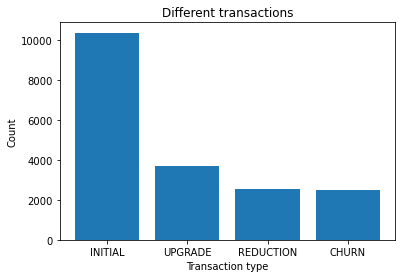

In [29]:
#Creating a bar plot for the "transaction_type" column
transaction_type_counts = transactions_df.transaction_type.value_counts()
plt.bar(transaction_type_counts.index, transaction_type_counts.values)
plt.title("Different transactions")
plt.xlabel("Transaction type")
plt.ylabel("Count")
plt.show()

This graph shows that the majority of transactions are initial, followed by upgrade, and then reductions and churn. Out of the total transactions, the most common type of transaction is Initial, with 10,366 transactions, which represents approximately 54.3% of the total transactions.

In [30]:
#Checking the unique values of the "transaction_type" column
transactions_df.subscription_type.unique()

array(['BASIC', 'MAX', 'PRO', 'pro', 'max'], dtype=object)

It shows that for "MAX" they have used "MAX" and "max" and for "PRO" they have used "pro" and "PRO".

In [31]:
#Replacing "pro" with "PRO" and "max" with "MAX"
transactions_df.subscription_type.replace("max","MAX",inplace=True)
transactions_df.subscription_type.replace("pro","PRO",inplace=True)
transactions_df.subscription_type.unique()

array(['BASIC', 'MAX', 'PRO'], dtype=object)

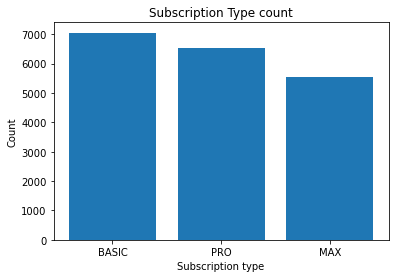

In [32]:
#Creating a bar plot for the "subscription_type" column
subscription_type_counts = transactions_df.subscription_type.value_counts()
plt.bar(subscription_type_counts.index, subscription_type_counts.values)
plt.title("Subscription Type count")
plt.xlabel("Subscription type")
plt.ylabel("Count")
plt.show()

According to this graph, BASIC has the highest number of subscribers, followed by PRO and MAX.

Now we can create a new column in this dataset to reprasent the amount customers paid for each subscription using the "subscription_prices.json" data set

In [33]:
subscription_prices

,2020,2021,2022
BASIC,33,43,53
PRO,65,75,85
MAX,99,109,119


From this it is clear that the subscription price depends on the year and type of subsrciption so we can make a new column in the transaction data set. Also if the transaction_type is "CHURN" then the subscription price is considered as 0.

In [34]:
#Converting "transaction_date" column to DateTime format
transactions_df.transaction_date = pd.to_datetime(transactions_df.transaction_date)

In [35]:
# defining a lambda function to calculate price based on date and subscription type
get_price = lambda x: 33 if (x.transaction_date.year == 2020 and x.subscription_type == 'BASIC' and x.transaction_type != 'CHURN') else \
                         65 if (x.transaction_date.year == 2020 and x.subscription_type == 'PRO'and x.transaction_type != 'CHURN') else \
                         99 if (x.transaction_date.year == 2020 and x.subscription_type == 'MAX'and x.transaction_type != 'CHURN') else \
                         43 if (x.transaction_date.year == 2021 and x.subscription_type == 'BASIC'and x.transaction_type != 'CHURN') else \
                         75 if (x.transaction_date.year == 2021 and x.subscription_type == 'PRO'and x.transaction_type != 'CHURN') else \
                         109 if (x.transaction_date.year == 2021 and x.subscription_type == 'MAX'and x.transaction_type != 'CHURN') else \
                         53 if (x.transaction_date.year == 2022 and x.subscription_type == 'BASIC'and x.transaction_type != 'CHURN') else \
                         85 if (x.transaction_date.year == 2022 and x.subscription_type == 'PRO'and x.transaction_type != 'CHURN') else \
                         119 if (x.transaction_date.year == 2022 and x.subscription_type == 'MAX'and x.transaction_type != 'CHURN') else 0

In [36]:
#Creating a new column named "subscription_price" using the previously defined function
transactions_df['subscription_price'] = transactions_df.apply(get_price, axis=1)

In [37]:
transactions_df

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price
0,1,INITIAL,2020-09-01,BASIC,33
1,2,INITIAL,2022-03-01,BASIC,53
2,3,INITIAL,2020-10-01,MAX,99
3,4,INITIAL,2022-05-01,PRO,85
4,5,INITIAL,2022-08-01,BASIC,53
...,...,...,...,...,...
19136,10192,CHURN,2020-11-01,BASIC,0
19137,10193,CHURN,2022-07-01,PRO,0
19138,10207,CHURN,2021-10-01,PRO,0
19139,10262,CHURN,2021-08-01,BASIC,0


### Joining the dataframes to form the final data set

Now the final data set can be created by combining all the above 3 dataframes using "cust_id" as the key. But except for the "transactions_df" the "cust_id" column in other two dataframes are having the data type as object and in the "demographics_df" "cust_id" is is a combination of number and string. So in the next step the "cust_id" is converted to a form that can be used for combining the dataframes.

In [38]:
#Renaming the column "id" in referral_df with "cust_id"
referral_df.rename(columns = {'id':'cust_id'}, inplace = True)

In [39]:
#Replacing the "str" ids to integer values
demographics_df['cust_id'] = demographics_df['cust_id'].str.extract('(\d+)', expand=False).astype(int)    
referral_df['cust_id'] = referral_df['cust_id'].str.extract('(\d+)', expand=False).astype(int)

##### Making the final data set

In [40]:
print(f"Number of elements in demographics_df is:{demographics_df.shape[0]} \n Number of elements in referral_df is:{referral_df.shape[0]} \n Number of elements in transactions_df is:{transactions_df.shape[0]}")

Number of elements in demographics_df is:10366 
 Number of elements in referral_df is:19141 
 Number of elements in transactions_df is:19094


In [55]:
#Making the final dataset by merging all the dataframes using "cust_id" as key
final_df = pd.merge(demographics_df,referral_df, on = "cust_id", how = "inner")
final_df = pd.merge(final_df,transactions_df, on = "cust_id", how = "inner")
final_df = final_df.drop_duplicates()
final_df.shape

(19080, 9)